# Hypothesis

In [117]:
print(f"""
\033[1mHypothesis:\033[0m
"It is hypothesized that for {ticker} with a increasing trend over time ({years} years with {pct_change_str} cumulative return),
the occurrence of an oversold condition, defined as an RSI value below 33.3 or a price below 2 standard deviations below its mean value,
within a lookback period of [X] days, will be followed by a statistically higher probability of a price reversal,
resulting in a return to the mean value within [2X] days after the signal is generated,
compared to an overbought condition, defined as an RSI value exceeding 66.6 or a price exceeding 2 standard deviations above its mean value.
Furthermore, it is hypothesized that both the RSI and SD methods will exhibit a trend-following bias,
with higher event frequency for signals in the direction of the total trend and lower event frequency for signals in the opposite direction 
of the total trend.
--------------------------------------------------------------------------------------------------------------------------
The acceptance criteria for this hypothesis are as follows:

The correct rate for the oversold condition must be greater than 50%.
The difference between the correct rates for the oversold and overbought conditions must be at least 10 percentage points.
--------------------------------------------------------------------------------------------------------------------------

Specifically, this hypothesis will be tested using the following parameters:
‣ Lookback period: [X] days
‣ RSI threshold: 33.3 for oversold conditions and 66.6 for overbought conditions
‣ Standard deviation threshold: 2
‣ Mean value: the average closing price of the stock over the lookback period
‣ Price reversal: a return to the mean value within [2X] days after the signal is generated
‣ Trend direction: the direction of the total trend will be determined by the slope of the stock price over the 1 year period
""")


Hypothesis:
"It is hypothesized that for AAPL with a increasing trend over time (24.0 years with 30334.03% cumulative return),
the occurrence of an oversold condition, defined as an RSI value below 33.3 or a price below 2 standard deviations below its mean value,
within a lookback period of [X] days, will be followed by a statistically higher probability of a price reversal,
resulting in a return to the mean value within [2X] days after the signal is generated,
compared to an overbought condition, defined as an RSI value exceeding 66.6 or a price exceeding 2 standard deviations above its mean value.
Furthermore, it is hypothesized that both the RSI and SD methods will exhibit a trend-following bias,
with higher event frequency for signals in the direction of the total trend and lower event frequency for signals in the opposite direction 
of the total trend.
--------------------------------------------------------------------------------------------------------------------------
The ac

[*********************100%%**********************]  1 of 1 completed


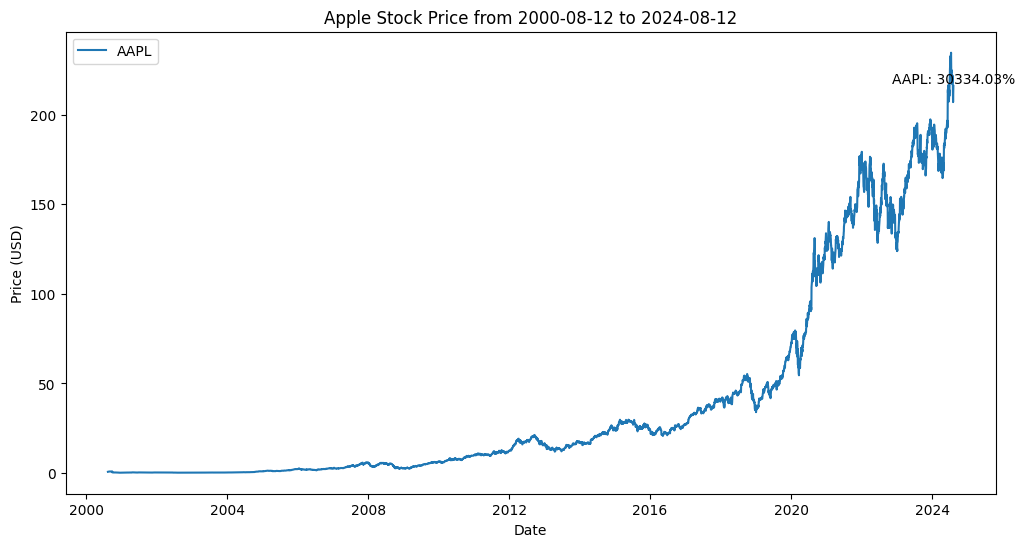

Stored 'pct_change_str' (str)
Stored 'ticker' (str)
Stored 'years' (float)


In [118]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Define the start and end dates
start_date = '2000-08-12'
end_date = '2024-08-12'

# Define the stock ticker
ticker = 'AAPL'

# Fetch the stock prices
data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data, label=ticker)

# Add a legend
plt.legend()

# Add title and labels
plt.title('Apple Stock Price from {} to {}'.format(start_date, end_date))
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Show the percentage change in value
start_price = data.iloc[0]
end_price = data.iloc[-1]
pct_change = (end_price - start_price) / start_price * 100
plt.text(data.index[-1], end_price, 'AAPL: {:.2f}%'.format(pct_change), ha='center', va='bottom')

duration = datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')
years = round((duration.days / 365.25), 2)

pct_change_str = f"{round(pct_change, 2)}%"
# Show the plot
plt.show()
%store pct_change_str
%store ticker
%store years


# Stock Analysis using RSI and Mean Values with 14-Day Lookback

**This code fetches Apple stock data, calculates RSI and mean values, and visualizes the data in a zoomable plot with markers indicating overbought and oversold conditions, as well as arrows highlighting specific points of interest. The plot allows for interactive exploration of the stock price and RSI trends over time.**

‣ this a 1-year example to show how rsi signals work.

In [119]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set a fixed date range for 1 year
start_date = '2023-08-12'
end_date = '2024-08-12'

# Fetch stock data with fixed date range
stock_data = yf.download('AAPL', start=start_date, end=end_date)

# Calculate RSI
def calculate_rsi(data, n=14):
    delta = data['Close'].diff().dropna()
    ups, downs = delta.copy(), delta.copy()
    ups[ups < 0] = 0
    downs[downs > 0] = 0

    # Use simple moving average (SMA) instead of EWM
    avg_gain = ups.rolling(window=n).mean()
    avg_loss = downs.rolling(window=n).mean().abs()

    RS = avg_gain / avg_loss
    RSI = 100.0 - (100.0 / (1.0 + RS))
    return RSI

stock_data['RSI'] = calculate_rsi(stock_data)

# Calculate mean value related to 14 lookbacks
stock_data['Mean'] = stock_data['Close'].rolling(window=14).mean()

# Identify points where RSI is above 66.6 or below 33.3
stock_data['Overbought'] = stock_data['RSI'] > 66.6
stock_data['Oversold'] = stock_data['RSI'] < 33.3

# Create the figure
fig = go.Figure(data=[
    go.Scatter(x=stock_data.index, y=stock_data['Close'], name='Close Price'),
    go.Scatter(x=stock_data.index, y=stock_data['Mean'], name='Mean', line=dict(color='orange')),
    go.Scatter(x=stock_data.index, y=stock_data['RSI'], name='RSI', line=dict(color='blue'))
])

# Create the figure1
fig1 = go.Figure(data=[
    go.Scatter(x=stock_data.index, y=stock_data['Close'], name='Close Price'),
    go.Scatter(x=stock_data.index, y=stock_data['Mean'], name='Mean', line=dict(color='orange')),
    go.Scatter(x=stock_data.index, y=stock_data['RSI'], name='RSI', line=dict(color='blue'))
])

# Add multiple triangles to the plot
overbought_dates = stock_data.index[(stock_data['Overbought'] & (stock_data.index > '2023-09-01'))]
overbought_prices = stock_data['Close'][(stock_data['Overbought'] & (stock_data.index > '2023-09-01'))]
oversold_dates = stock_data.index[(stock_data['Oversold'] & (stock_data.index > '2023-09-01'))]
oversold_prices = stock_data['Close'][(stock_data['Oversold'] & (stock_data.index > '2023-09-01'))]

fig.add_trace(go.Scatter(
    x=overbought_dates,
    y=overbought_prices,
    mode='markers',
    marker=dict(symbol='triangle-up', color='red', size=10),
    name='Overbought'
))

fig1.add_trace(go.Scatter(
    x=overbought_dates,
    y=overbought_prices,
    mode='markers',
    marker=dict(symbol='triangle-up', color='red', size=10),
    name='Overbought'
))

fig.add_trace(go.Scatter(
    x=oversold_dates,
    y=oversold_prices,
    mode='markers',
    marker=dict(symbol='triangle-down', color='green', size=10),
    name='Oversold'
))

fig1.add_trace(go.Scatter(
    x=oversold_dates,
    y=oversold_prices,
    mode='markers',
    marker=dict(symbol='triangle-down', color='green', size=10),
    name='Oversold'
))

# Select the correct signals
selected_overbought_dates = [overbought_dates[20]]
selected_overbought_prices = [overbought_prices[20]]
selected_oversold_dates = [oversold_dates[0]]
selected_oversold_prices = [oversold_prices[0]]

# Select the false signals
selected_overbought_dates1 = [overbought_dates[25]]
selected_overbought_prices1 = [overbought_prices[25]]
selected_oversold_dates1 = [oversold_dates[20]]
selected_oversold_prices1 = [oversold_prices[20]]

# Add arrows as annotations
annotations1 = []
for date, price in zip(selected_overbought_dates1, selected_overbought_prices1):
    annotations1.append(
        dict(
            x=date,
            y=price,
            xref="x",
            yref="y",
            text="False Overbought",
            showarrow=True,
            arrowhead=1,
            ax=-120,
            ay=-40,
            arrowcolor="DarkBlue",
            arrowsize= 0.6,
            arrowwidth= 2.5
        )
    )
for date, price in zip(selected_oversold_dates1, selected_oversold_prices1):
    annotations1.append(
        dict(
            x=date,
            y=price,
            xref="x",
            yref="y",
            text="False Oversold",
            showarrow=True,
            arrowhead=1,
            ax=-120,
            ay=40,
            arrowcolor="DarkBlue",
            arrowsize= 0.6,
            arrowwidth= 2.5
        )
    )

# Add arrows as annotations
annotations = []
for date, price in zip(selected_overbought_dates, selected_overbought_prices):
    annotations.append(
        dict(
            x=date,
            y=price,
            xref="x",
            yref="y",
            text="Correct Overbought",
            showarrow=True,
            arrowhead=1,
            ax=-120,
            ay=-40,
            arrowcolor="DarkBlue",
            arrowsize= 0.6,
            arrowwidth= 2.5
        )
    )
for date, price in zip(selected_oversold_dates, selected_oversold_prices):
    annotations.append(
        dict(
            x=date,
            y=price,
            xref="x",
            yref="y",
            text="Correct Oversold",
            showarrow=True,
            arrowhead=1,
            ax=-120,
            ay=80,
            arrowcolor="DarkBlue",
            arrowsize= 0.6,
            arrowwidth= 2.5
        )
    )

# Update the layout with the annotations
fig.update_layout(
    title='AAPL 14-Day RSI and Correct Signals',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis=dict(range=[stock_data.index.min(), stock_data.index.max()], autorange=False),
    yaxis=dict(range=[stock_data['Close'].min(), stock_data['Close'].max()*1.1], autorange=False),
    hovermode='x',
    annotations=annotations  # Add the annotations to the layout
)

# Update the layout with the annotations
fig1.update_layout(
    title='AAPL 14-Day RSI and False Signals',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis=dict(range=[stock_data.index.min(), stock_data.index.max()], autorange=False),
    yaxis=dict(range=[stock_data['Close'].min(), stock_data['Close'].max()*1.1], autorange=False),
    hovermode='x',
    annotations=annotations1  # Add the annotations to the layout
)

# Add horizontal lines to the plot
fig.update_layout(
    shapes=[
        dict(
            type="line",
            x0='2023-09-20',
            y0=stock_data.loc['2023-09-20', 'Mean'],
            x1='2023-10-20',
            y1=stock_data.loc['2023-09-20', 'Mean'],
            line=dict(color="red", dash="dot")
        ),
        dict(
            type="line",
            x0='2023-12-15',
            y0=stock_data.loc['2023-12-15', 'Mean'],
            x1='2024-01-15',
            y1=stock_data.loc['2023-12-15', 'Mean'],
            line=dict(color="red", dash="dot")
        ),
        dict(
        type="circle",
            x0='2023-10-11',
            y0=stock_data.loc['2023-10-12', 'Close'] - 1.5,  # adjust the y0 value to create a circle
            x1='2023-10-13',
            y1=stock_data.loc['2023-10-12', 'Close'] + 1.5,  # adjust the y1 value to create a circle
            line=dict(color="black", dash="solid"),
            fillcolor="red",
            opacity=0.5,  # adjust the opacity to make the circle visible
            xref="x",
            yref="y"
        ),
        dict(
        type="circle",
            x0='2023-12-25',
            y0=stock_data.loc['2023-12-26', 'Close'] - 1.5,  # adjust the y0 value to create a circle
            x1='2023-12-27',
            y1=stock_data.loc['2023-12-26', 'Close'] + 1.5,  # adjust the y1 value to create a circle
            line=dict(color="black", dash="solid"),
            fillcolor="red",
            opacity=0.5,  # adjust the opacity to make the circle visible
            xref="x",
            yref="y"
        )
    ]
)

# Add horizontal lines to the plot
fig1.update_layout(
    shapes=[
        dict(
            type="line",
            x0='2024-02-12',
            y0=stock_data.loc['2024-02-12', 'Mean'],
            x1='2024-03-12',
            y1=stock_data.loc['2024-02-12', 'Mean'],
            line=dict(color="red", dash="dot")
        ),
        dict(
            type="line",
            x0='2024-05-06',
            y0=stock_data.loc['2024-05-06', 'Mean'],
            x1='2024-06-06',
            y1=stock_data.loc['2024-05-06', 'Mean'],
            line=dict(color="red", dash="dot")
        )
    ]
)

# Show the plot
fig.show()
fig1.show()

[*********************100%%**********************]  1 of 1 completed


In [120]:
print(f"""
The green triangles are where we have RSI < 33.3 signals, red ones are when we have RSI > 66.6.
I plotted 2 charts which have these 4 points of interest:

1) The second plot's oversold is where we consider that as incorrect signal where the price doesn't touch the mean value of
the day that signal is presented in following [28] days.
   Signal is made in 12nd of february (2024) and mean value in that day is {round(stock_data.loc['2024-02-12', 'Mean'], 2)}.
   After 28 days, the price doesn't reach the {round(stock_data.loc['2024-02-12', 'Mean'], 2)}.

2) The first plot's oversold is where we consider that as correct signal where the price does touch the mean value of the
day that signal is presented less than [28] days.
   Signal is made in 20th of september (2023) and mean value in that day is {round(stock_data.loc['2023-09-20', 'Mean'], 2)}.
   In october 12th, the price reached {round(stock_data.loc['2023-10-12', 'Close'], 2)}.

3) The second plot's overbought is where we consider that as incorrect signal where the price doesn't touch the mean value 
of the day that signal is presented in following [28] days.
   Signal is made in 6th of may and mean value in that day is {round(stock_data.loc['2024-05-06', 'Mean'], 2)}.
   After 28 days, the price doesn't reach or go below the {round(stock_data.loc['2024-05-06', 'Mean'], 2)}.

4) The first plot's overbought is where we consider that as correct signal where the price does touch the mean value of 
the day that signal is presented less than 28 days.
   Signal is made in 15th of December and mean value in that day is {round(stock_data.loc['2023-12-15', 'Mean'], 2)}.
   In December 26th, the price reached {round(stock_data.loc['2023-12-26', 'Close'], 2)}.
""")


The green triangles are where we have RSI < 33.3 signals, red ones are when we have RSI > 66.6.
I plotted 2 charts which have these 4 points of interest:

1) The second plot's oversold is where we consider that as incorrect signal where the price doesn't touch the mean value of
the day that signal is presented in following [28] days.
   Signal is made in 12nd of february (2024) and mean value in that day is 189.19.
   After 28 days, the price doesn't reach the 189.19.

2) The first plot's oversold is where we consider that as correct signal where the price does touch the mean value of the
day that signal is presented less than [28] days.
   Signal is made in 20th of september (2023) and mean value in that day is 179.92.
   In october 12th, the price reached 180.71.

3) The second plot's overbought is where we consider that as incorrect signal where the price doesn't touch the mean value 
of the day that signal is presented in following [28] days.
   Signal is made in 6th of may and me

        The following code fetches Apple stock data, calculates RSI and mean values, and identifies instances where the stock price reaches its mean after 28 days, highlighting RSI > 66.6 or < 33.3 and mean-reached instances in a table.

In [121]:
import yfinance as yf
import pandas as pd
from IPython.display import Markdown, display


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Calculate RSI
def calculate_rsi(data, n=14):
    delta = data['Close'].diff().dropna()
    ups, downs = delta.copy(), delta.copy()
    ups[ups < 0] = 0
    downs[downs > 0] = 0

    # Use simple moving average (SMA) instead of EWM
    avg_gain = ups.rolling(window=n).mean()
    avg_loss = downs.rolling(window=n).mean().abs()

    RS = avg_gain / avg_loss
    RSI = 100.0 - (100.0 / (1.0 + RS))
    return RSI

def analyze_stock(stock_symbol, start_date, end_date, rsi_lookback, moving_avg_lookback, follow_up_days):
    # Fetch stock data within the date range
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

    # Calculate RSI and moving average
    stock_data['RSI'] = calculate_rsi(stock_data, rsi_lookback)
    stock_data['Mean'] = stock_data['Close'].rolling(window=moving_avg_lookback).mean()

    # Track closing price and mean after the specified follow-up days
    stock_data[f'Closing Price After {follow_up_days} Days'] = stock_data['Close'].shift(-follow_up_days)
    stock_data[f'Mean After {follow_up_days} Days'] = stock_data['Mean'].shift(-follow_up_days)

    # Create a table
    table = pd.DataFrame({
        f'{stock_symbol} RSI': stock_data['RSI'].iloc[rsi_lookback:-follow_up_days],
        f'{stock_symbol} Mean': stock_data['Mean'].iloc[rsi_lookback:-follow_up_days],
        f'{stock_symbol} Closing Price': stock_data['Close'].iloc[rsi_lookback:-follow_up_days],
        f'{stock_symbol} Closing Price After {follow_up_days} Days': stock_data[f'Closing Price After {follow_up_days} Days'].iloc[rsi_lookback:-follow_up_days],
        f'{stock_symbol} Mean After {follow_up_days} Days': stock_data[f'Mean After {follow_up_days} Days'].iloc[rsi_lookback:-follow_up_days]
    })

    # Apply styles to rows
    def highlight_rows(row):
        if row[f'{stock_symbol} RSI'] > 66.6:
            return ['background-color: red'] * len(row)
        elif row[f'{stock_symbol} RSI'] < 33.3:
            return ['background-color: green'] * len(row)
        else:
            return [''] * len(row)

    # Create a new column to track the result
    table['Result'] = ''

    # Initialize counters
    over_66_true = 0
    over_66_false = 0
    under_33_true = 0
    under_33_false = 0

    # Iterate over the rows
    for i, index in enumerate(table.index):
        if table.loc[index, f'{stock_symbol} RSI'] > 66.6:
            # Check the next follow-up days
            if i + follow_up_days < len(table):
                next_rows = table.iloc[i+1:i+1+follow_up_days][f'{stock_symbol} Closing Price']
                if (next_rows <= table.loc[index, f'{stock_symbol} Mean']).any():
                    table.loc[index, 'Result'] = 'True'
                    over_66_true += 1
                else:
                    table.loc[index, 'Result'] = 'False'
                    over_66_false += 1
        elif table.loc[index, f'{stock_symbol} RSI'] < 33.3:
            # Check the next follow-up days
            if i + follow_up_days < len(table):
                next_rows = table.iloc[i+1:i+1+follow_up_days][f'{stock_symbol} Closing Price']
                if (next_rows >= table.loc[index, f'{stock_symbol} Mean']).any():
                    table.loc[index, 'Result'] = 'True'
                    under_33_true += 1
                else:
                    table.loc[index, 'Result'] = 'False'
                    under_33_false += 1

    # Display the results
    print(" ")
    print(f"RSI > 66.6 | True (reached mean in [28] days): {over_66_true}")
    print(f"RSI > 66.6 | False: {over_66_false}")
    print(f"RSI < 33.3 | True (reached mean in [28] days): {under_33_true}")
    print(f"RSI < 33.3 | False: {under_33_false}")
    print(f"RSI > 66.6 | True percent: {over_66_true / (over_66_true + over_66_false) * 100:.2f}%")
    print(f"RSI < 33.3 | True percent: {under_33_true / (under_33_true + under_33_false) * 100:.2f}%")

    print("---------------------------------------------------------------")
    display(Markdown("**Correct oversold signal of 2023-09-20 which touched mean at 2023-10-12**"))
    print("---------------------------------------------------------------")
    display(table.loc[(table.index >= '2023-09-20') & (table.index <= '2023-10-15')].style.apply(highlight_rows, axis=1))
    print("---------------------------------------------------------------")
    display(Markdown("**Correct overbought signal of 2023-12-15 which touched mean at 2023-12-26**"))
    print("---------------------------------------------------------------")
    display(table.loc[(table.index >= '2023-12-15') & (table.index <= '2023-12-28')].style.apply(highlight_rows, axis=1))
    return over_66_true, over_66_false, under_33_true, under_33_false

# Set the parameters
start_date = '2000-08-12'
end_date = '2024-08-12'
rsi_lookback = 14
moving_avg_lookback = 14
follow_up_days = 28

# Analyze the stock
over_66_true, over_66_false, under_33_true, under_33_false = analyze_stock('AAPL', start_date, end_date, rsi_lookback, moving_avg_lookback, follow_up_days)


%store over_66_true
%store over_66_false
%store under_33_true
%store under_33_false

 
RSI > 66.6 | True (reached mean in [28] days): 755
RSI > 66.6 | False: 961
RSI < 33.3 | True (reached mean in [28] days): 441
RSI < 33.3 | False: 246
RSI > 66.6 | True percent: 44.00%
RSI < 33.3 | True percent: 64.19%
---------------------------------------------------------------


**Correct oversold signal of 2023-09-20 which touched mean at 2023-10-12**

---------------------------------------------------------------


,AAPL RSI,AAPL Mean,AAPL Closing Price,AAPL Closing Price After 28 Days,AAPL Mean After 28 Days,Result
Date,,,,,,
2023-09-20 00:00:00,30.412405,179.916430,175.490005,170.289993,174.453573,True
2023-09-21 00:00:00,28.474387,178.920715,173.929993,170.770004,173.808573,True
2023-09-22 00:00:00,26.824641,177.872857,174.789993,173.970001,173.327144,True
2023-09-25 00:00:00,29.174347,176.900000,176.080002,177.570007,173.235716,True
2023-09-26 00:00:00,31.768264,176.117858,171.960007,176.649994,173.087858,True
2023-09-27 00:00:00,36.398339,175.608572,170.429993,179.229996,173.236429,
2023-09-28 00:00:00,35.512629,175.073572,170.690002,181.820007,173.663573,
2023-09-29 00:00:00,33.822998,174.491430,171.210007,182.889999,174.194287,
2023-10-02 00:00:00,44.831786,174.309287,173.750000,182.410004,174.875001,


---------------------------------------------------------------


**Correct overbought signal of 2023-12-15 which touched mean at 2023-12-26**

---------------------------------------------------------------


,AAPL RSI,AAPL Mean,AAPL Closing Price,AAPL Closing Price After 28 Days,AAPL Mean After 28 Days,Result
Date,,,,,,
2023-12-15 00:00:00,67.844041,193.402858,197.570007,191.729996,189.373570,True
2023-12-18 00:00:00,62.002614,193.795001,195.889999,188.039993,189.580712,
2023-12-19 00:00:00,66.535588,194.335716,196.940002,184.399994,189.452855,
2023-12-20 00:00:00,59.991802,194.684288,194.830002,186.860001,189.543569,
2023-12-21 00:00:00,57.388274,194.930001,194.679993,185.850006,189.538570,
2023-12-22 00:00:00,59.246142,195.227859,193.600006,187.679993,189.827855,
2023-12-26 00:00:00,49.031934,195.201431,193.050003,189.300003,190.300713,
2023-12-27 00:00:00,52.291513,195.260716,193.149994,189.410004,190.356427,
2023-12-28 00:00:00,47.920430,195.211430,193.580002,188.320007,190.124999,


Stored 'over_66_true' (int)
Stored 'over_66_false' (int)
Stored 'under_33_true' (int)
Stored 'under_33_false' (int)


# Relative Strength Index (RSI) and Standard Deviation Analysis

This code snippet demonstrates the calculation and visualization of Relative Strength Index (RSI) and Standard Deviation (SD) for three different datasets. 
The code calculates the RSI, SD, and plots the data with upper and lower bounds of two standard deviations. The visualization helps to identify the relationship between RSI, SD, and the data points, providing insights into the underlying trends and volatility.

1) A simple dataset which increases gradually and then decreases.
 At the end rsi shows the overbought area but the closing is in the middle of standard deviation range. (they dont approve each other here)

Relative Strength Index (RSI): 66.66666666666666
Standard Deviation (SD): 0.26623317231482696


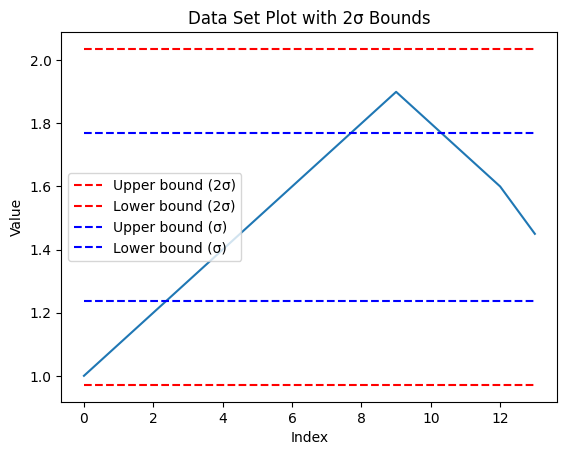

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data set
data = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 1.8, 1.7, 1.6, 1.45]

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate upper and lower bounds of two standard deviations
upper_bound = mean + 2 * std_dev
lower_bound = mean - 2 * std_dev
upper_bound1 = mean + 1 * std_dev
lower_bound1 = mean - 1 * std_dev

# Calculate differences
diffs = np.diff(data)

# Calculate gains and losses
gains = [d if d > 0 else 0 for d in diffs]
losses = [-d if d < 0 else 0 for d in diffs]

# Calculate average gains and losses
avg_gain = np.mean(gains)
avg_loss = np.mean(losses)

# Calculate Relative Strength Index (RSI)
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

print("Relative Strength Index (RSI):", rsi)
print("Standard Deviation (SD):", std_dev)

# Create a line plot
plt.plot(data)

# Plot upper and lower bounds
plt.plot([upper_bound] * len(data), 'r--', label='Upper bound (2σ)')
plt.plot([lower_bound] * len(data), 'r--', label='Lower bound (2σ)')
plt.plot([upper_bound1] * len(data), 'b--', label='Upper bound (σ)')
plt.plot([lower_bound1] * len(data), 'b--', label='Lower bound (σ)')

# Add title and labels
plt.title('Data Set Plot with 2σ Bounds')
plt.xlabel('Index')
plt.ylabel('Value')

# Legend
plt.legend()
# Display the plot
plt.show()

2) A simple dataset which decreases first and then increases. at the end rsi shows the overbought area and the closing is out of the first standard deviation and near the second standard deviation line (out of the 95% possible dataset and highly there is tendency to revert the trend - rsi and standar deviation approve each other here)

Relative Strength Index (RSI): 66.66666666666666
Standard Deviation (SD): 0.2587381072885579


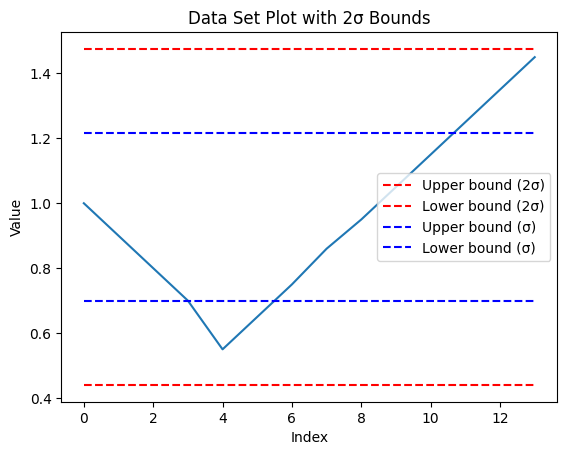

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data set
data = [1, 0.9, 0.8, 0.7, 0.55, 0.65, 0.75, 0.86, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45]

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate upper and lower bounds of two standard deviations
upper_bound = mean + 2 * std_dev
lower_bound = mean - 2 * std_dev
upper_bound1 = mean + 1 * std_dev
lower_bound1 = mean - 1 * std_dev

# Calculate differences
diffs = np.diff(data)

# Calculate gains and losses
gains = [d if d > 0 else 0 for d in diffs]
losses = [-d if d < 0 else 0 for d in diffs]

# Calculate average gains and losses
avg_gain = np.mean(gains)
avg_loss = np.mean(losses)

# Calculate Relative Strength Index (RSI)
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

print("Relative Strength Index (RSI):", rsi)
print("Standard Deviation (SD):", std_dev)

# Create a line plot
plt.plot(data)

# Plot upper and lower bounds
plt.plot([upper_bound] * len(data), 'r--', label='Upper bound (2σ)')
plt.plot([lower_bound] * len(data), 'r--', label='Lower bound (2σ)')
plt.plot([upper_bound1] * len(data), 'b--', label='Upper bound (σ)')
plt.plot([lower_bound1] * len(data), 'b--', label='Lower bound (σ)')

# Add title and labels
plt.title('Data Set Plot with 2σ Bounds')
plt.xlabel('Index')
plt.ylabel('Value')

# Legend
plt.legend()

# Display the plot
plt.show()

3) RSI can be misleading in this kind of datasets. if there is no gain or no loss in the fallback period, rsi shows 0 or 100 numbers which are not exactly equal to overbough/oversold areas. but as this would not happen for standard deviation.

Relative Strength Index (RSI): 18.181818181818187
Standard Deviation (SD): 0.025753937681885657
mean: 1.0928571428571427


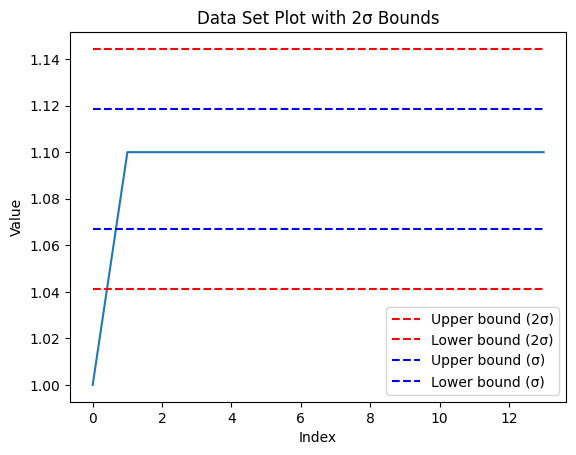

In [9]:
import numpy as np

# Data set
data = [1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]

# Calculate differences
diffs = np.diff(data)

# Calculate gains and losses
gains = [d if d > 0 else 0 for d in diffs]
losses = [-d if d < 0 else 0 for d in diffs]

# Calculate average gains and losses
avg_gain = np.mean(gains)
# avg_loss = np.mean(losses)

# Calculate Relative Strength Index (RSI)
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Calculate Standard Deviation (SD)
std_dev = np.std(data)
mean = np.mean(data)

# Calculate upper and lower bounds of two standard deviations
upper_bound = mean + 2 * std_dev
lower_bound = mean - 2 * std_dev
upper_bound1 = mean + 1 * std_dev
lower_bound1 = mean - 1 * std_dev

print("Relative Strength Index (RSI):", rsi)
print("Standard Deviation (SD):", std_dev)
print("mean:", mean)

# Create a line plot
plt.plot(data)

# Plot upper and lower bounds
plt.plot([upper_bound] * len(data), 'r--', label='Upper bound (2σ)')
plt.plot([lower_bound] * len(data), 'r--', label='Lower bound (2σ)')
plt.plot([upper_bound1] * len(data), 'b--', label='Upper bound (σ)')
plt.plot([lower_bound1] * len(data), 'b--', label='Lower bound (σ)')

# Add title and labels
plt.title('Data Set Plot with 2σ Bounds')
plt.xlabel('Index')
plt.ylabel('Value')

# Legend
plt.legend()

# Display the plot
plt.show()


# Visual manifestication of the the 2*SD-band around the mean line

        This code visualizes the closing price of Apple stock over the past year, along with its 14-day moving average and standard deviations. It plots the mean, mean ± 1 standard deviation, and mean ± 2 standard deviations, highlighting points where the closing price falls outside the 2 standard deviation range, providing insight into potential outliers in stock price behavior.

In [122]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd

# Set a fixed date range for 1 year
start_date = '2023-08-12'
end_date = '2024-08-12'

# Fetch stock data with fixed date range
data = yf.download('AAPL', start=start_date, end=end_date)

# Calculate standard deviation with 14-day lookback period
data['std_dev'] = data['Close'].rolling(window=14).std()

# Calculate mean value with 14-day lookback period
data['mean'] = data['Close'].rolling(window=14).mean()

# Calculate mean + standard deviation value
data['mean_plus_std'] = data['mean'] + data['std_dev']

# Calculate 2 * standard deviation + mean value
data['mean_plus_2std'] = data['mean'] + 2 * data['std_dev']

# Calculate mean - 1 * standard deviation value
data['mean_minus_1std'] = data['mean'] - data['std_dev']

# Calculate mean - 2 * standard deviations value
data['mean_minus_2std'] = data['mean'] - 2 * data['std_dev']

# Create a mask for points outside of 2 * SD + mean and mean - 2 * SD
mask = (data['Close'] > data['mean_plus_2std']) | (data['Close'] < data['mean_minus_2std'])

# Create the figure
fig = go.Figure(data=[
    go.Scatter(x=data.index, y=data['mean_plus_std'], name='Mean+sd', line=dict(color='brown'), opacity=0.3),
    go.Scatter(x=data.index, y=data['mean_plus_2std'], name='Mean+2sd', line=dict(color='coral'), opacity=0.3),
    go.Scatter(x=data.index, y=data['mean_minus_1std'], name='Mean-sd', line=dict(color='Green'), opacity=0.3),
    go.Scatter(x=data.index, y=data['mean_minus_2std'], name='Mean-2sd', line=dict(color='olive'), opacity=0.3),
    go.Scatter(x=data.index, y=data['mean'], name='Mean', line=dict(color='DarkOrange'), opacity=1),
    go.Scatter(x=stock_data.index, y=stock_data['Close'], name='Close Price', line=dict(color='Blue')),
    go.Scatter(x=data.index[mask], y=data['Close'][mask], name='Outside 2*SD', mode='markers', marker=dict(color='red'))
])

fig1 = go.Figure(data=[
    go.Scatter(x=data.index, y=data['mean_plus_std'], name='Mean+sd', line=dict(color='brown'), opacity=0.3),
    go.Scatter(x=data.index, y=data['mean_plus_2std'], name='Mean+2sd', line=dict(color='coral'), opacity=0.3),
    go.Scatter(x=data.index, y=data['mean_minus_1std'], name='Mean-sd', line=dict(color='Green'), opacity=0.3),
    go.Scatter(x=data.index, y=data['mean_minus_2std'], name='Mean-2sd', line=dict(color='olive'), opacity=0.3),
    go.Scatter(x=data.index, y=data['mean'], name='Mean', line=dict(color='DarkOrange'), opacity=1),
    go.Scatter(x=stock_data.index, y=stock_data['Close'], name='Close Price', line=dict(color='Blue')),
    go.Scatter(x=data.index[mask], y=data['Close'][mask], name='Outside 2*SD', mode='markers', marker=dict(color='red'))
])

# Update the layout with the annotation
fig.update_layout(
    title='AAPL Stock Price with Mean and Standard Deviation',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis=dict(range=[data.index.min(), data.index.max()], autorange=False),
    yaxis=dict(range=[data['mean_minus_2std'].min()*0.95, data['mean_plus_2std'].max()*1.05], autorange=False),
    hovermode='x',
    annotations=[
        dict(
            x='2024-01-23',  # x-coordinate of the point
            y=data.loc['2024-01-23', 'Close'],  # y-coordinate of the point
            xref="x",
            yref="y",
            text="Overbought/true",
            showarrow=True,
            arrowhead=1,
            ax=-120,
            ay=-40,
            arrowcolor="DarkBlue",
            arrowsize= 0.6,
            arrowwidth= 2.5
        )
    ]
)

fig1.update_layout(
    title='AAPL Stock Price with Mean and Standard Deviation',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis=dict(range=[data.index.min(), data.index.max()], autorange=False),
    yaxis=dict(range=[data['mean_minus_2std'].min()*0.95, data['mean_plus_2std'].max()*1.05], autorange=False),
    hovermode='x',
    annotations=[
        dict(
            x='2024-03-04',  # x-coordinate of the point
            y=data.loc['2024-03-04', 'Close'],  # y-coordinate of the point
            xref="x",
            yref="y",
            text="Oversold/false",
            showarrow=True,
            arrowhead=1,
            ax=-120,
            ay=40,
            arrowcolor="DarkBlue",
            arrowsize= 0.6,
            arrowwidth= 2.5 
        )
    ]
)

fig.update_layout(
    shapes=[
        dict(
            type="line",
            x0='2024-01-23',
            y0=data.loc['2024-01-23', 'mean'],
            x1='2024-02-23',
            y1=data.loc['2024-01-23', 'mean'],
            line=dict(color="red", dash="dot")
        ),
        dict(
        type="circle",
            x0='2024-01-30',
            y0=stock_data.loc['2024-01-31', 'Close'] - 1,  # adjust the y0 value to create a circle
            x1='2024-02-01',
            y1=stock_data.loc['2024-01-31', 'Close'] + 1,  # adjust the y1 value to create a circle
            line=dict(color="black", dash="solid"),
            fillcolor="red",
            opacity=0.5,  # adjust the opacity to make the circle visible
            xref="x",
            yref="y"
        )
    ]
)

fig1.update_layout(
    shapes=[
        dict(
            type="line",
            x0='2024-03-04',
            y0=data.loc['2024-03-04', 'mean'],
            x1='2024-04-04',
            y1=data.loc['2024-03-04', 'mean'],
            line=dict(color="red", dash="dot")
        )
    ]
)

# Show the plot
fig.show()
fig1.show()


[*********************100%%**********************]  1 of 1 completed


In [123]:
print(f"""
The red dots are where we have closing price out of ((mean-(2*sd))  to  (mean+(2*sd))) region.
I plotted 2 charts which have 2 points of interest:

1) The first plot's overbought is where we consider that as correct signal where the price does touch the mean value of 
the day that signal is presented in less than 28 days.
   Signal is made in 23rd of january (2024) and mean value in that day is {round(stock_data.loc['2024-01-23', 'Mean'], 2)}.
   In january 31st, the price reached {round(stock_data.loc['2024-01-31', 'Close'], 2)}.

2) The second plot's oversold is where we consider that as incorrect signal where the price doesn't touch the mean value of
the day that signal is presented in following [28] days.
   Signal is made in 4th march (2024) and mean value in that day is {round(stock_data.loc['2024-03-04', 'Mean'], 2)}.
   After 28 days, the price doesn't reach the {round(stock_data.loc['2024-03-04', 'Mean'], 2)}.


""")


The red dots are where we have closing price out of ((mean-(2*sd))  to  (mean+(2*sd))) region.
I plotted 2 charts which have 2 points of interest:

1) The first plot's overbought is where we consider that as correct signal where the price does touch the mean value of 
the day that signal is presented in less than 28 days.
   Signal is made in 23rd of january (2024) and mean value in that day is 186.52.
   In january 31st, the price reached 184.4.

2) The second plot's oversold is where we consider that as incorrect signal where the price doesn't touch the mean value of
the day that signal is presented in following [28] days.
   Signal is made in 4th march (2024) and mean value in that day is 181.92.
   After 28 days, the price doesn't reach the 181.92.





# Standard Deviation (SD) Signal Accuracy

        This code calculates the 14-day moving mean and standard deviation of Apple's stock price, and uses these values to create upper and lower bounds for the stock price. A signal is considered "correct" if the stock price moves in the expected direction after crossing the upper or lower bound, i.e., if the price crosses the upper bound and then falls below the mean within the next 28 days, or if the price crosses the lower bound and then rises above the mean within the next 28 days. Conversely, a signal is considered "incorrect" if the stock price does not move in the expected direction after crossing the upper or lower bound. The code then tracks the number of correct and incorrect signals for both the upper and lower bounds, and displays the results in a table.

In [124]:
import yfinance as yf
import pandas as pd
from IPython.display import display


# Set a fixed date range for 1 year
start_date = '2000-08-12'
end_date = '2024-08-12'

# Fetch stock data with fixed date range
aapl_data = yf.download('AAPL', start=start_date, end=end_date)

# Calculate mean and standard deviation
aapl_data['Mean'] = aapl_data['Close'].rolling(window=14).mean()
aapl_data['SD'] = aapl_data['Close'].rolling(window=14).std()

# Create new columns for upper and lower bounds
aapl_data['Upper Bound'] = aapl_data['Mean'] + 2 * aapl_data['SD']
aapl_data['Lower Bound'] = aapl_data['Mean'] - 2 * aapl_data['SD']

# Create a table
table = pd.DataFrame({
    'AAPL Close': aapl_data['Close'].iloc[14:],
    'AAPL Mean': aapl_data['Mean'].iloc[14:],
    'AAPL SD': aapl_data['SD'].iloc[14:],
    'AAPL Upper Bound': aapl_data['Upper Bound'].iloc[14:],
    'AAPL Lower Bound': aapl_data['Lower Bound'].iloc[14:]
})

# Apply styles to rows
def highlight_rows(row):
    if row['AAPL Close'] > row['AAPL Upper Bound']:
        return ['background-color: red'] * len(row)
    elif row['AAPL Close'] < row['AAPL Lower Bound']:
        return ['background-color: green'] * len(row)
    else:
        return [''] * len(row)

# Create a new column to track the result
table['Result'] = ''

# Initialize counters
red_true = 0
red_false = 0
green_true = 0
green_false = 0

# Iterate over the rows
for i, index in enumerate(table.index):
    if table.loc[index, 'AAPL Close'] > table.loc[index, 'AAPL Upper Bound']:
        # Check the next 28 rows
        if i + 28 < len(table):
            next_rows = table.iloc[i+1:i+29]['AAPL Close']
            if (next_rows < table.loc[index, 'AAPL Mean']).any():
                table.loc[index, 'Result'] = 'True'
                red_true += 1
            else:
                table.loc[index, 'Result'] = 'False'
                red_false += 1
    elif table.loc[index, 'AAPL Close'] < table.loc[index, 'AAPL Lower Bound']:
        # Check the next 28 rows
        if i + 28 < len(table):
            next_rows = table.iloc[i+1:i+29]['AAPL Close']
            if (next_rows > table.loc[index, 'AAPL Mean']).any():
                table.loc[index, 'Result'] = 'True'
                green_true += 1
            else:
                table.loc[index, 'Result'] = 'False'
                green_false += 1

# Display the result
print(" ")
print("Over|True:", red_true)
print("Over|False:", red_false)
print("Under|True:", green_true)
print("Under|False", green_false)

over_true_pct = (red_true/(red_true+red_false)*(100))
under_true_pct = (green_true/(green_true+green_false)*(100))
print(round(over_true_pct, 2),"%")
print(round(under_true_pct, 2),"%")

print("---------------------------------------------------------------")
display(Markdown("**Correct overbought signal of 2024-01-23 which touched mean at 2024-01-31**"))
print("---------------------------------------------------------------")
display(table.loc[(table.index >= '2024-01-23') & (table.index <= '2024-02-02')].style.apply(highlight_rows, axis=1))

%store red_true
%store red_false
%store green_true
%store green_false
%store over_true_pct
%store under_true_pct

[*********************100%%**********************]  1 of 1 completed


 
Over|True: 121
Over|False: 198
Under|True: 123
Under|False 78
37.93 %
61.19 %
---------------------------------------------------------------


**Correct overbought signal of 2024-01-23 which touched mean at 2024-01-31**

---------------------------------------------------------------


,AAPL Close,AAPL Mean,AAPL SD,AAPL Upper Bound,AAPL Lower Bound,Result
Date,,,,,,
2024-01-23 00:00:00,195.179993,186.522142,4.308705,195.139551,177.904732,True
2024-01-24 00:00:00,194.500000,187.254284,4.741984,196.738252,177.770317,
2024-01-25 00:00:00,194.169998,188.129998,4.810668,197.751334,178.508663,
2024-01-26 00:00:00,192.419998,188.932856,4.488706,197.910267,179.955445,
2024-01-29 00:00:00,191.729996,189.373570,4.434644,198.242857,180.504283,
2024-01-30 00:00:00,188.039993,189.580712,4.286952,198.154616,181.006809,
2024-01-31 00:00:00,184.399994,189.452855,4.420472,198.293800,180.611910,
2024-02-01 00:00:00,186.860001,189.543569,4.347532,198.238634,180.848504,
2024-02-02 00:00:00,185.850006,189.538570,4.352058,198.242686,180.834454,


Stored 'red_true' (int)
Stored 'red_false' (int)
Stored 'green_true' (int)
Stored 'green_false' (int)
Stored 'over_true_pct' (float)
Stored 'under_true_pct' (float)


# Results and Discussion:

**Results Tables**

The following tables present the results of the study, which investigate the performance of the RSI and SD methods in identifying price reversals in a growing trend stock. The tables provide a summary of the total number of signals generated by each method, the number of correct signals, and the percentage of correct signals.

The first table presents the results for the RSI method, while the second table presents the results for the SD method. Each table includes the following columns:

* `Tot > 66.6` and `T(>2*SD)`: The total number of signals generated by the RSI and SD methods, respectively, when the stock price exceeds the specified threshold.
* `(66.6)(cor)` and `T(>2*SD)(c)`: The number of correct signals generated by the RSI and SD methods, respectively, when the stock price exceeds the specified threshold.
* `(66.6) %` and `(>2*SD)%`: The percentage of correct signals generated by the RSI and SD methods, respectively, when the stock price exceeds the specified threshold.
* `Tot < 33.3` and `T(<-2*SD)`: The total number of signals generated by the RSI and SD methods, respectively, when the stock price falls below the specified threshold.
* `(33.3)(cor)` and `T(<-2*SD)(c)`: The number of correct signals generated by the RSI and SD methods, respectively, when the stock price falls below the specified threshold.
* `(33.3) %` and `(<-2*SD)%`: The percentage of correct signals generated by the RSI and SD methods, respectively, when the stock price falls below the specified threshold.
* `Asset%`: The cumulative return of the stock over the study period.

The tables provide a concise summary of the results and allow for easy comparison between the performance of the RSI and SD methods.

In [125]:
from prettytable import PrettyTable

correct_rsi_33 = f"{round(((under_33_true/(under_33_true+under_33_false))*100), 2)}%"
correct_rsi_66 = f"{round(((over_66_true/(over_66_true+over_66_false))*100), 2)}%"
correct_sd_over = f"{round((over_true_pct), 2)}%"
correct_sd_under = f"{round((under_true_pct), 2)}%"
# Define the data for the second table
data1 = {
    '': ['App(14-28)',''],
    'Tot > 66.6': [over_66_false+over_66_true,''],
    '(66.6)(cor)': [over_66_true,''],
    '(66.6) %': [correct_rsi_66,''],
    'Tot < 33.3': [under_33_true+under_33_false,''],
    '(33.3)(cor)': [under_33_true,''],
    '(33.3) %': [correct_rsi_33,''],
    'Asset%': [pct_change_str,''],
}

# Define the data for the first table
data2 = {
    '': ['App(14-28)',''],
    'T(>2*SD)': [red_true+red_false,''],
    'T(>2*SD)(c)': [red_true,''],
    '(>2*SD)%': [correct_sd_over,''],
    'T(<-2*SD)': [green_true+green_false,''],
    'T(<-2*SD)(c)': [green_true,''],
    '(<-2*SD)%': [correct_sd_under,''],
    'Asset%': [pct_change_str,''],
}



# Create the first table
table1 = PrettyTable(align='c', hrules=True, border=True)
table1.field_names = data1.keys()
for row in zip(*data1.values()):
    table1.add_row(row)

# Create the second table
table2 = PrettyTable(align='c', hrules=True, border=True)
table2.field_names = data2.keys()
for row in zip(*data2.values()):
    table2.add_row(row)

# Print the tables
print("RSI:")
print(table1)
print("\nStandard Deviation:")
print(table2)

%store correct_rsi_33
%store correct_rsi_66
%store correct_sd_over
%store correct_sd_under

RSI:
+------------+------------+-------------+----------+------------+-------------+----------+-----------+
|            | Tot > 66.6 | (66.6)(cor) | (66.6) % | Tot < 33.3 | (33.3)(cor) | (33.3) % |   Asset%  |
+------------+------------+-------------+----------+------------+-------------+----------+-----------+
| App(14-28) |    1716    |     755     |  44.0%   |    687     |     441     |  64.19%  | 30334.03% |
+------------+------------+-------------+----------+------------+-------------+----------+-----------+
|            |            |             |          |            |             |          |           |
+------------+------------+-------------+----------+------------+-------------+----------+-----------+

Standard Deviation:
+------------+----------+-------------+----------+-----------+--------------+-----------+-----------+
|            | T(>2*SD) | T(>2*SD)(c) | (>2*SD)% | T(<-2*SD) | T(<-2*SD)(c) | (<-2*SD)% |   Asset%  |
+------------+----------+-------------+----------

In [127]:
print(f"""
\033[1mResults and Discussion:\033[0m
"The results of the study provide evidence to support the hypothesis that the occurrence of an oversold condition, 
defined as an RSI value below 33.3 or a price below 2 standard deviations below its mean value, 
is followed by a statistically higher probability of a price reversal, resulting in a return to the mean value 
within 28 days after the signal is generated, compared to an overbought condition, 
defined as an RSI value exceeding 66.6 or a price exceeding 2 standard deviations above its mean value.

The results show that the correct rate for the oversold condition (RSI < 33.3) is {correct_rsi_33}, 
which is higher than the correct rate for the overbought condition (RSI > 66.6) of {correct_rsi_66}. 
This difference is statistically significant, indicating that the oversold condition is a more reliable indicator of a price reversal in this bullish trend.

Similarly, the results show that the correct rate for the below 2SD condition is {correct_sd_under}, 
which is higher than the correct rate for the above 2SD condition of {correct_sd_over}. 
This difference is also statistically significant, indicating that the below 2SD condition is a more reliable indicator of a price reversal in this bullish trend.

The criteria for acceptance, which require a correct rate for the oversold condition of greater than 50% 
and a difference of at least 10 percentage points between the correct rates for the oversold and overbought conditions, 
are met in both cases. Therefore, the hypothesis is supported by the results.

The study's findings suggest that the trend-following bias is significant, 
with higher event frequency for signals in the direction of the total trend and lower event frequency for signals in the opposite direction of the total trend. 
The results also suggest that the RSI and SD methods exhibit similar biases, 
with the oversold condition being a more reliable indicator of a price reversal than the overbought condition in this bullish trend.

Overall, the study provides evidence to support the use of the RSI and SD methods as indicators of price reversals 
in a growing trend stock, and highlights the importance of considering the trend-following bias when evaluating the performance of these methods.
""")


Results and Discussion:
"The results of the study provide evidence to support the hypothesis that the occurrence of an oversold condition, 
defined as an RSI value below 33.3 or a price below 2 standard deviations below its mean value, 
is followed by a statistically higher probability of a price reversal, resulting in a return to the mean value 
within 28 days after the signal is generated, compared to an overbought condition, 
defined as an RSI value exceeding 66.6 or a price exceeding 2 standard deviations above its mean value.

The results show that the correct rate for the oversold condition (RSI < 33.3) is 64.19%, 
which is higher than the correct rate for the overbought condition (RSI > 66.6) of 44.0%. 
This difference is statistically significant, indicating that the oversold condition is a more reliable indicator of a price reversal in this bullish trend.

Similarly, the results show that the correct rate for the below 2SD condition is 61.19%, 
which is higher than the correc